In [3]:
import pandas as pd

# Load the uploaded CSV file
file_path=(r"C:\Users\HP\Downloads\Copy of Marketing Team Data  1.csv")
data = pd.read_csv(file_path)

# Display the first few rows and summary to understand its structure
#data.head(), 
data.info(), #data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   campaign ID                             33 non-null     object 
 1   Campaign Name                           33 non-null     object 
 2   Audience                                33 non-null     object 
 3   Age                                     33 non-null     object 
 4   Geography                               33 non-null     object 
 5   Reach                                   33 non-null     int64  
 6   Impressions                             33 non-null     int64  
 7   Frequency                               33 non-null     float64
 8   Clicks                                  33 non-null     int64  
 9   Unique Clicks                           33 non-null     int64  
 10  Unique Link Clicks (ULC)                33 non-null     int64  


(None,)

In [5]:
data.count()

campaign ID                               33
Campaign Name                             33
Audience                                  33
Age                                       33
Geography                                 33
Reach                                     33
Impressions                               33
Frequency                                 33
Clicks                                    33
Unique Clicks                             33
Unique Link Clicks (ULC)                  33
Click-Through Rate (CTR)                  33
Unique Click-Through Rate (Unique CTR)    33
Amount Spent in INR                       33
Cost Per Click (CPC)                      33
Cost per Result (CPR)                     32
@dropdown                                  0
@dropdown.1                                0
dtype: int64

In [7]:
cleaned_data = data.drop(columns=["@dropdown", "@dropdown.1"])

In [9]:
cleaned_data .head()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,209.17%,3.565469,"$1,092.24",$2.24,$6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,308.61%,4.291748,$835.46,$1.73,$5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,315.14%,5.057551,$319.38,$1.61,$4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,259.26%,4.499438,$86.25,$1.76,$4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,662.14%,6.719461,"$1,193.94",$0.46,$1.09


In [11]:

# Removing '$' from 'Amount Spent in INR', 'Cost Per Click (CPC)', 'Cost per Result (CPR)' and converting them to float
cleaned_data["Amount Spent in INR"] = cleaned_data["Amount Spent in INR"].replace('[\$,]', '', regex=True).astype(float)
cleaned_data["Cost Per Click (CPC)"] = cleaned_data["Cost Per Click (CPC)"].replace('[\$,]', '', regex=True).astype(float)
cleaned_data["Cost per Result (CPR)"] = pd.to_numeric(
    cleaned_data["Cost per Result (CPR)"].replace('[\$,]', '', regex=True), errors='coerce'
)

In [13]:
# Fill missing values in 'Cost per Result (CPR)' with the column's mean
cleaned_data["Cost per Result (CPR)"].fillna(cleaned_data["Cost per Result (CPR)"].mean(), inplace=True)


In [15]:
 cleaned_data.head()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR),Unique Click-Through Rate (Unique CTR),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR)
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,209.17%,3.565469,1092.24,2.24,6.07
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,308.61%,4.291748,835.46,1.73,5.43
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,315.14%,5.057551,319.38,1.61,4.91
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,259.26%,4.499438,86.25,1.76,4.11
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,662.14%,6.719461,1193.94,0.46,1.09


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Increase the size of the plots for better visibility
plt.rcParams["figure.figsize"] = (12, 6)


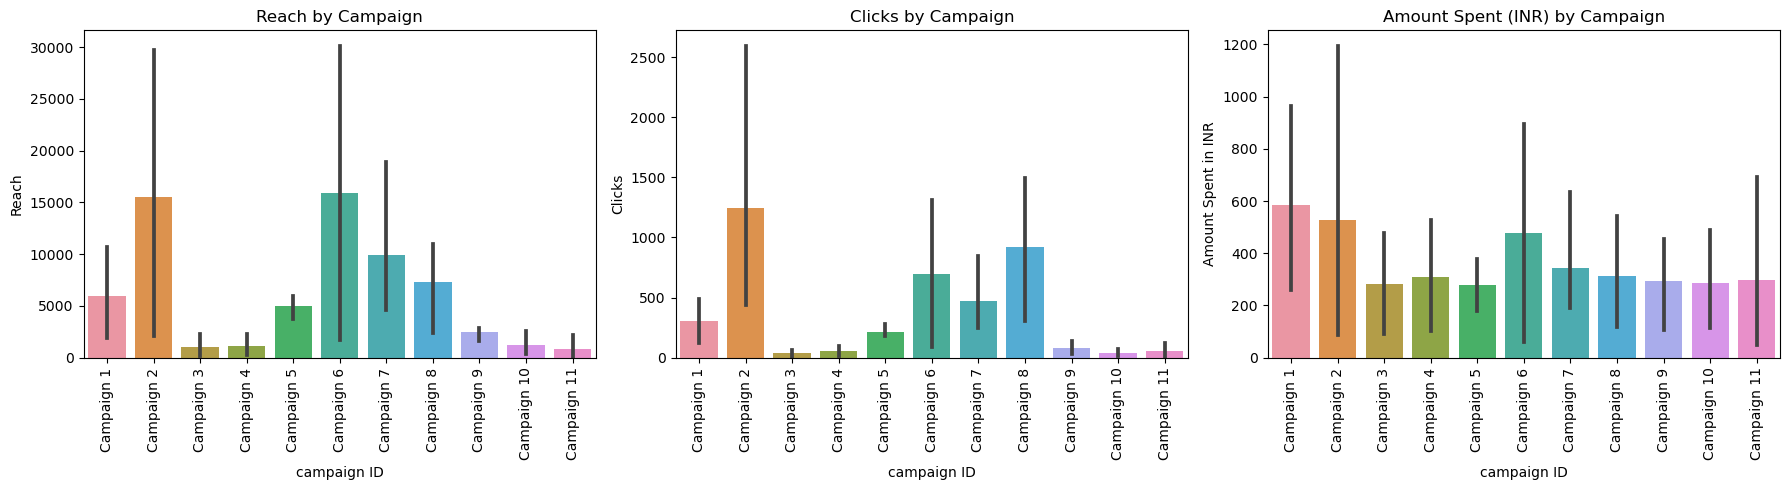

In [19]:
# 1. Bar Chart: Reach, Clicks, and Amount Spent by Campaign
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Reach by Campaign
sns.barplot(x='campaign ID', y='Reach', data=cleaned_data, ax=axes[0])
axes[0].set_title('Reach by Campaign')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot Clicks by Campaign
sns.barplot(x='campaign ID', y='Clicks', data=cleaned_data, ax=axes[1])
axes[1].set_title('Clicks by Campaign')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Plot Amount Spent by Campaign
sns.barplot(x='campaign ID', y='Amount Spent in INR', data=cleaned_data, ax=axes[2])
axes[2].set_title('Amount Spent (INR) by Campaign')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


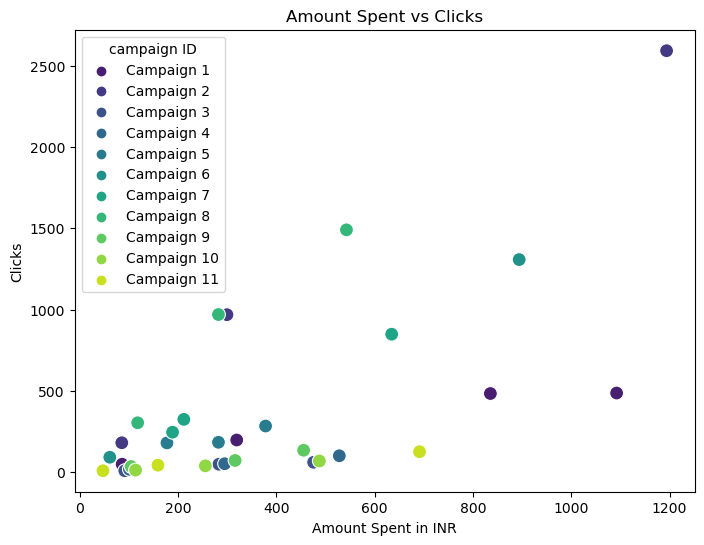

In [20]:
# 2. Scatter Plot: Amount Spent vs Clicks
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='Amount Spent in INR', y='Clicks', hue='campaign ID', palette='viridis', s=100)
plt.title('Amount Spent vs Clicks')
plt.show()

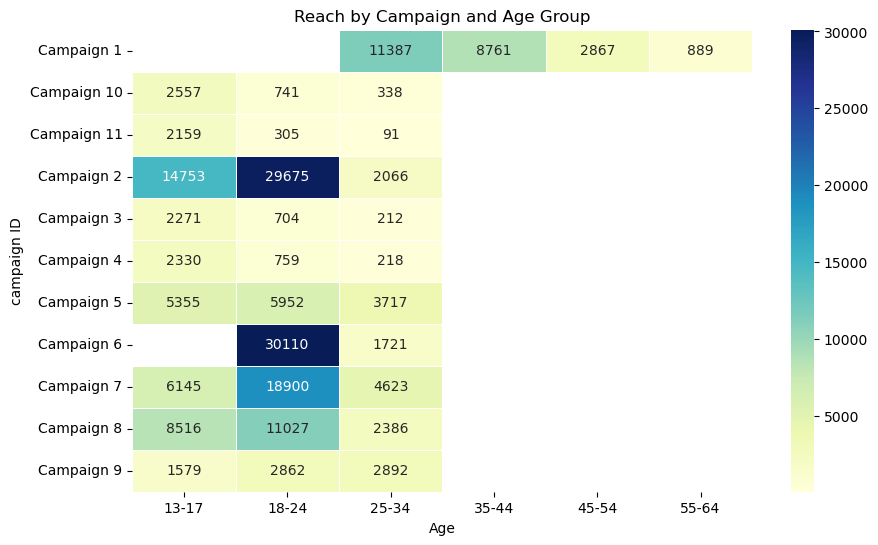

In [21]:
# 3. Heatmap: Campaign vs Age Group (for Reach)
pivot_table = cleaned_data.pivot_table(index='campaign ID', columns='Age', values='Reach', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)
plt.title('Reach by Campaign and Age Group')
plt.show()

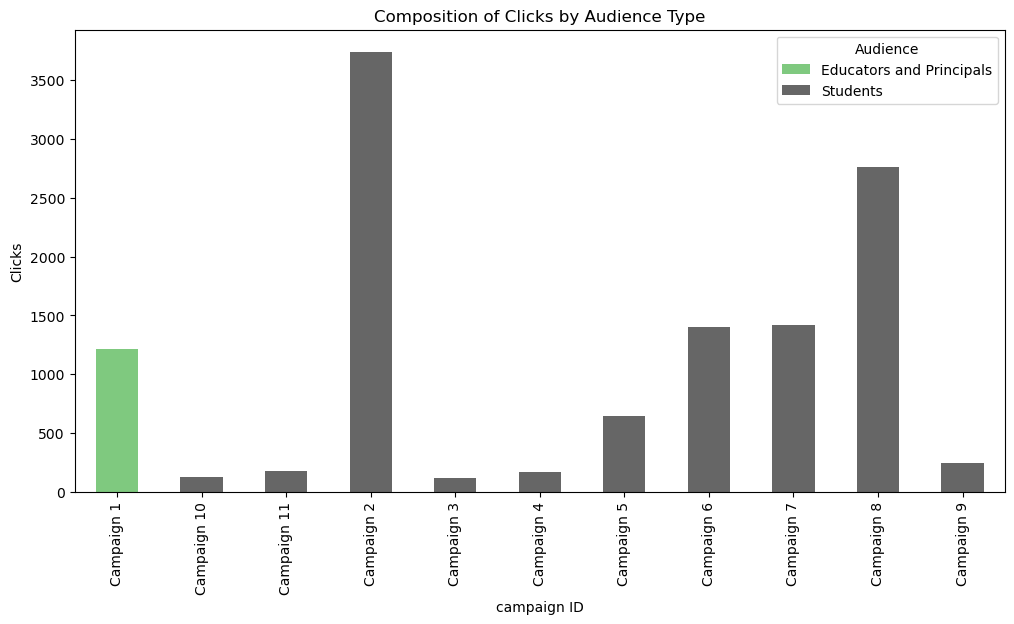

In [22]:
# 4. Stacked Bar Chart: Composition of Clicks by Audience Type
audience_clicks = cleaned_data.groupby(['campaign ID', 'Audience'])['Clicks'].sum().unstack().fillna(0)

audience_clicks.plot(kind='bar', stacked=True, colormap='Accent', figsize=(12, 6))
plt.title('Composition of Clicks by Audience Type')
plt.ylabel('Clicks')
plt.xticks(rotation=90)
plt.show()

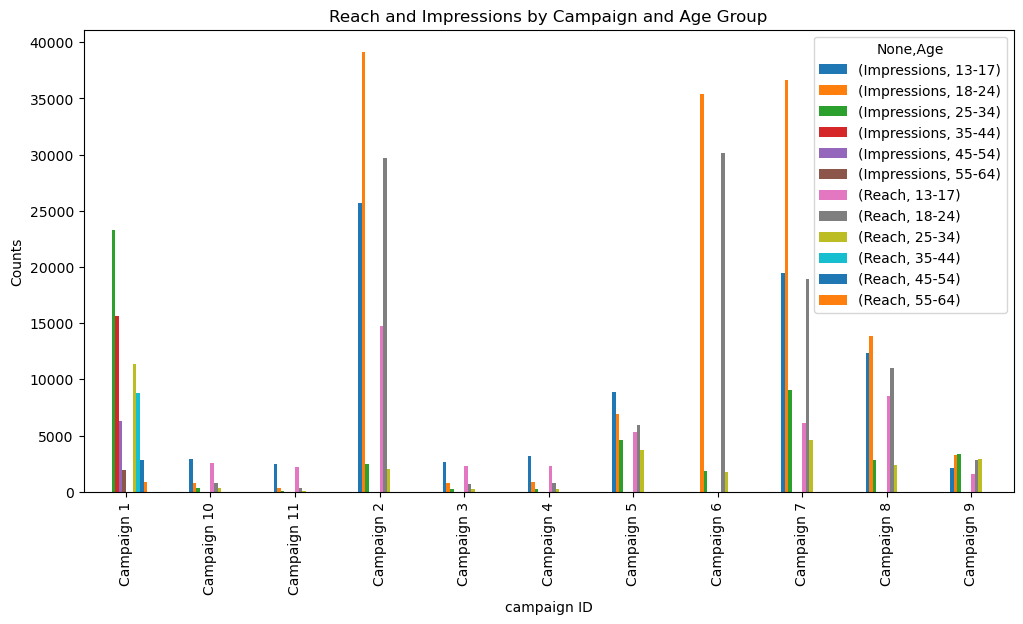

In [23]:
pivot_table = cleaned_data.pivot_table(index='campaign ID', columns='Age', values=['Reach', 'Impressions'], aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(12, 6)); plt.title('Reach and Impressions by Campaign and Age Group'); plt.ylabel('Counts'); plt.show()

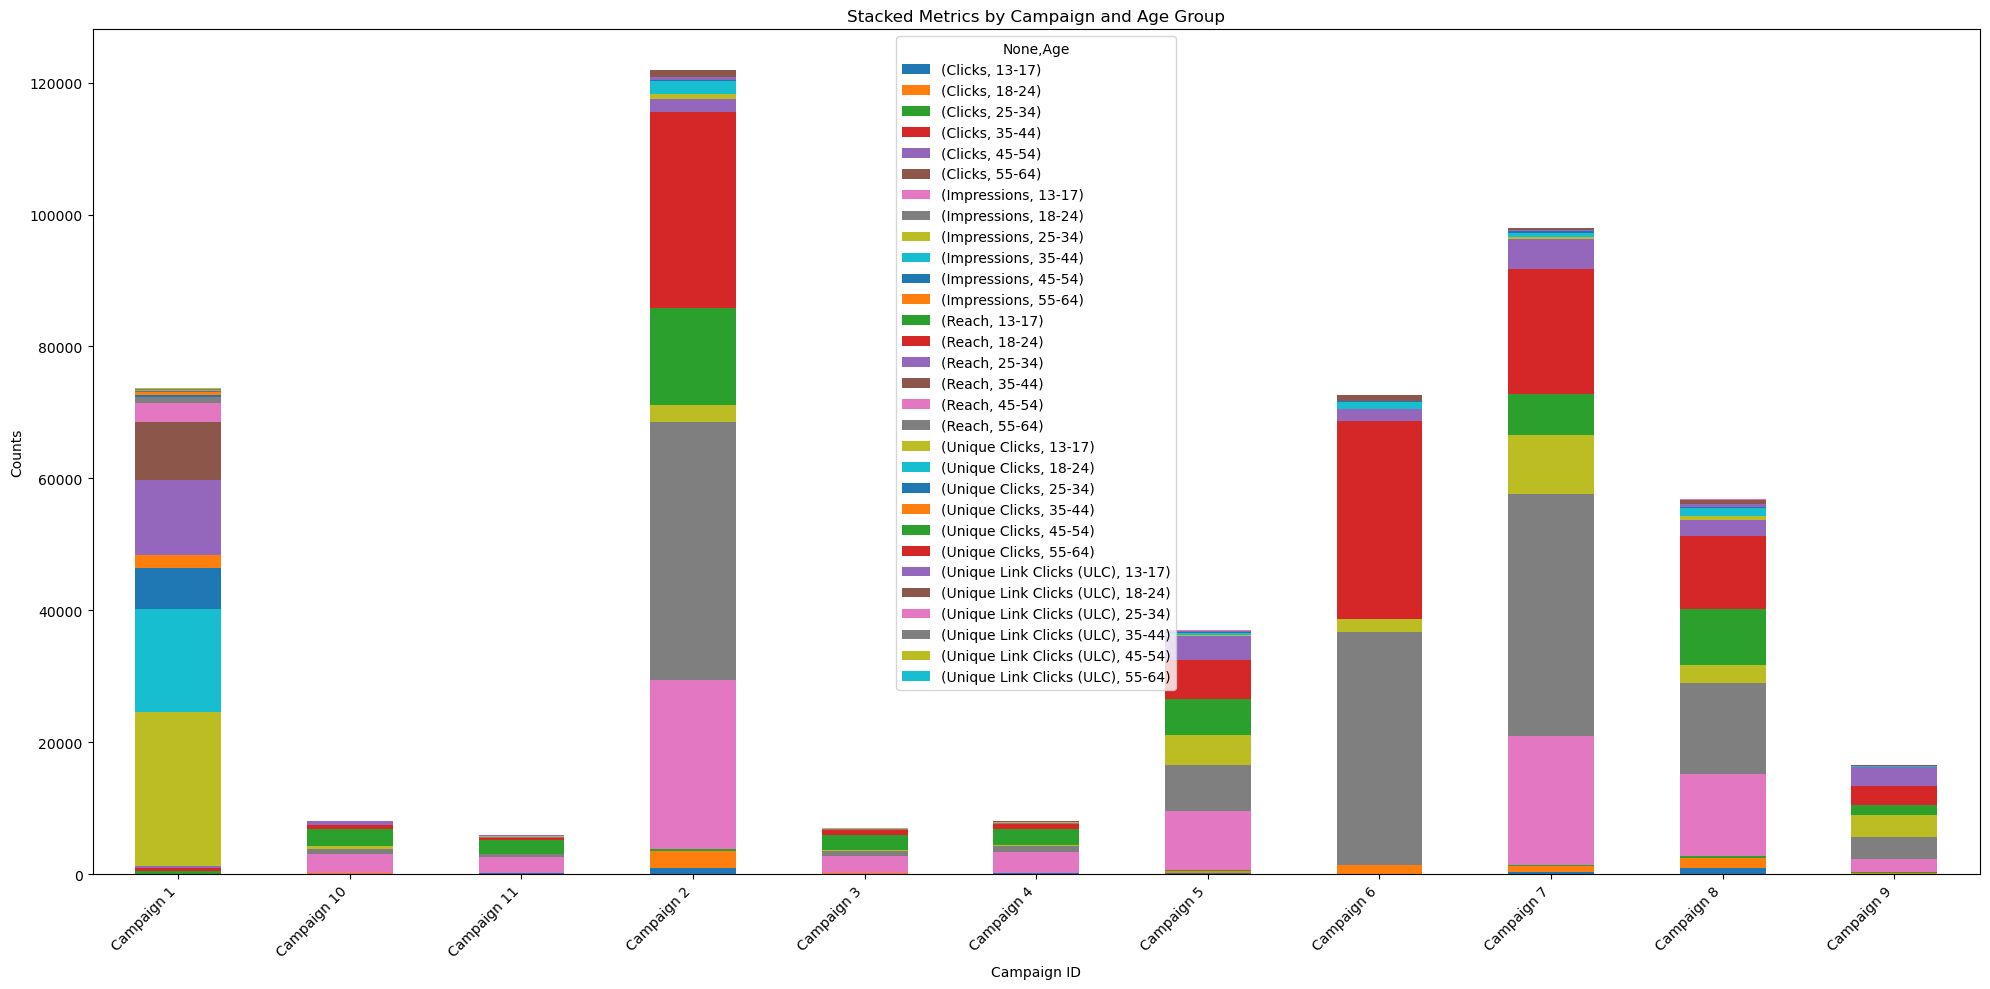

In [24]:
pivot_table = cleaned_data.pivot_table(index='campaign ID', columns='Age', values=['Reach', 'Impressions', 'Clicks', 'Unique Clicks', 'Unique Link Clicks (ULC)'], aggfunc='sum')
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(20, 10)); 
ax.set_title('Stacked Metrics by Campaign and Age Group'); 
ax.set_ylabel('Counts'); 
ax.set_xlabel('Campaign ID'); 
plt.xticks(rotation=45, ha='right');  # Adjust angle and alignment for x-ticks
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

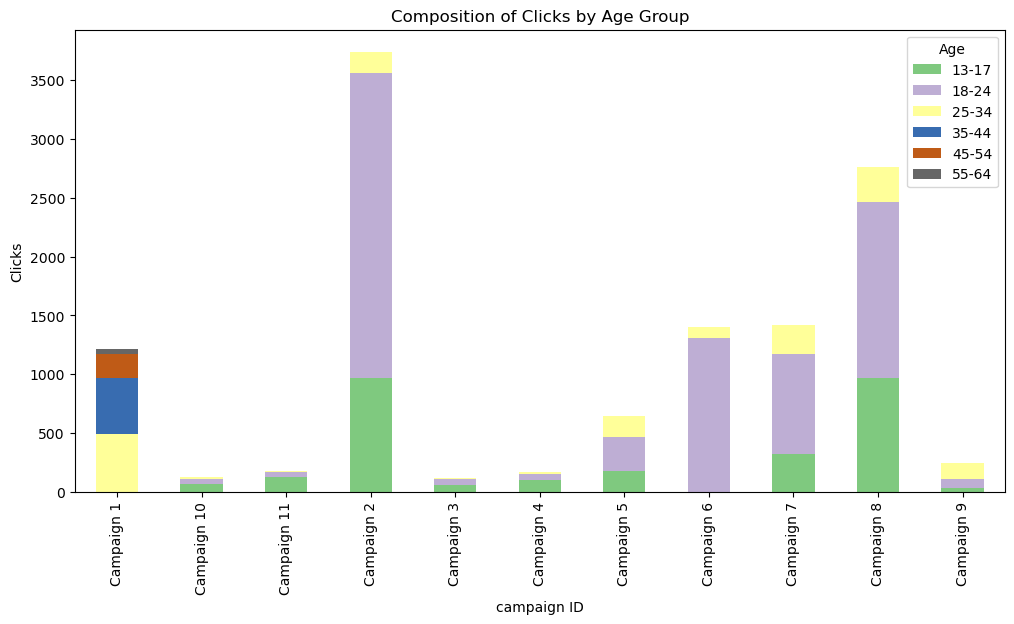

In [25]:
# Grouping the data by 'campaign ID' and 'Age' and summing the 'Clicks'
age_clicks = cleaned_data.groupby(['campaign ID', 'Age'])['Clicks'].sum().unstack().fillna(0)
age_clicks.plot(kind='bar', stacked=True, colormap='Accent', figsize=(12, 6))
plt.title('Composition of Clicks by Age Group')
plt.ylabel('Clicks')
plt.xticks(rotation=90)
plt.show()


In [26]:
#Result		
#Campaign ID	Age	Georapghy
#campaign 3	13-17	Australia 
#campaign 3	25-34	Australia 
#Campaign 10	13-17	uk

#new visualization

In [38]:
# Helper function to clean and convert columns to numeric
def clean_numeric_column(column):
    # Ensure the column is treated as strings
    column = column.astype(str)
    # Extract numeric values, remove non-numeric characters like $, %, etc.
    return pd.to_numeric(column.str.extract(r'([\d\.]+)')[0], errors='coerce')

# Clean the necessary columns
cleaned_data = cleaned_data.copy()  # Make a copy of the original data

cleaned_data['Cost per Result (CPR)'] = clean_numeric_column(cleaned_data['Cost per Result (CPR)'])
cleaned_data['Click-Through Rate (CTR)'] = clean_numeric_column(cleaned_data['Click-Through Rate (CTR)'])
cleaned_data['Cost Per Click (CPC)'] = clean_numeric_column(cleaned_data['Cost Per Click (CPC)'])

# Extracting unique campaigns
campaigns = cleaned_data['Campaign Name'].unique()

# Display the cleaned columns
print(cleaned_data[['Cost per Result (CPR)', 'Click-Through Rate (CTR)', 'Cost Per Click (CPC)']].head())

   Cost per Result (CPR)  Click-Through Rate (CTR)  Cost Per Click (CPC)
0                   6.07                    209.17                  2.24
1                   5.43                    308.61                  1.73
2                   4.91                    315.14                  1.61
3                   4.11                    259.26                  1.76
4                   1.09                    662.14                  0.46


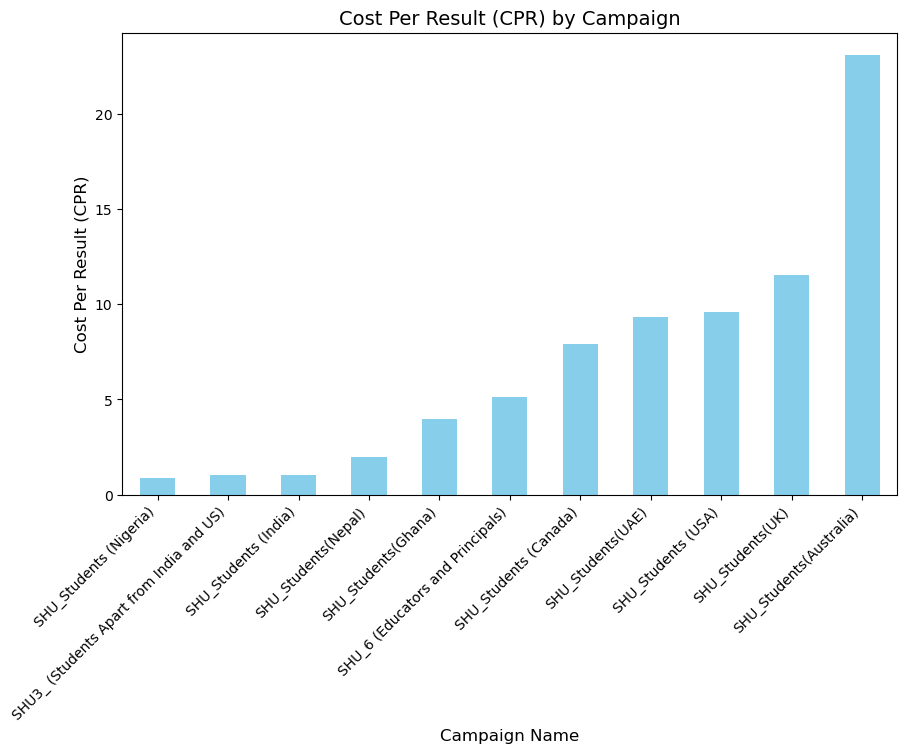

In [40]:
# 1. Cost Per Result (CPR) by Campaign
plt.figure(figsize=(10, 6))
cleaned_data.groupby('Campaign Name')['Cost per Result (CPR)'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Cost Per Result (CPR) by Campaign', fontsize=14)
plt.ylabel('Cost Per Result (CPR)', fontsize=12)
plt.xlabel('Campaign Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1456\2772189161.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(campaigns))  # 'tab20' gives 20 different colors


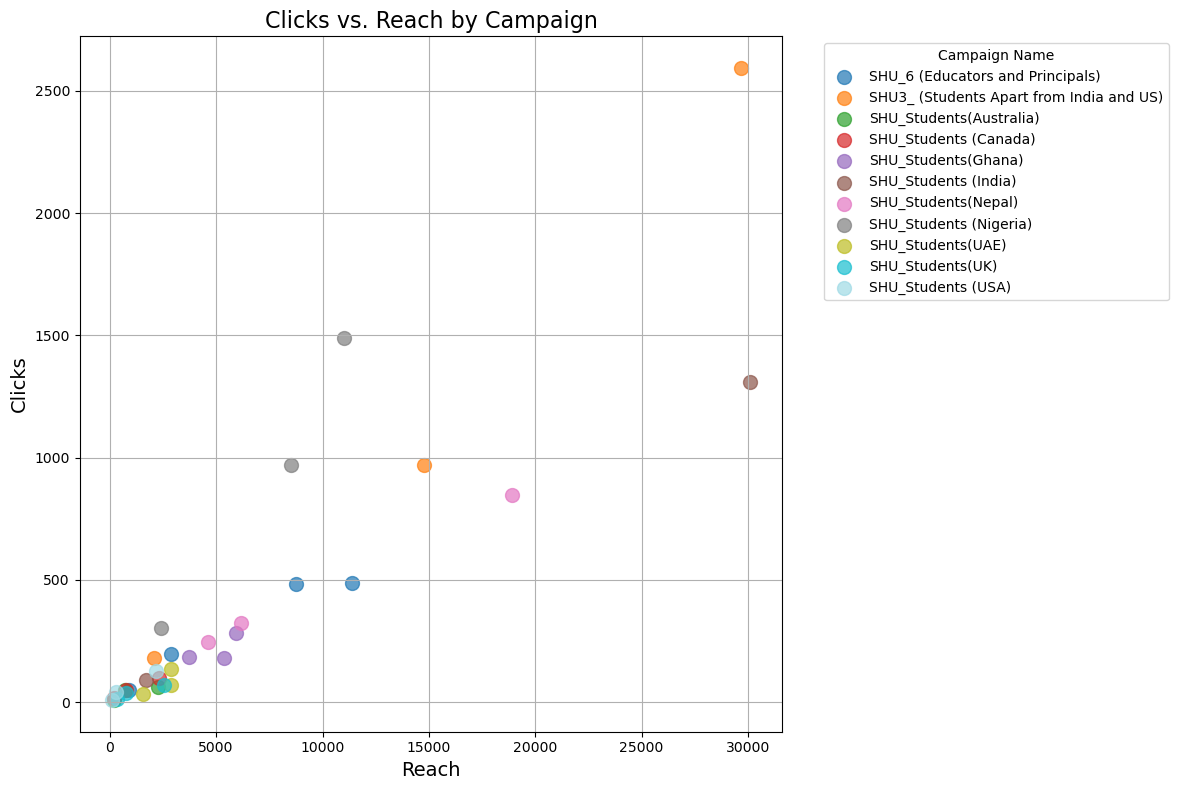

In [42]:
# Assign a unique color for each campaign using a colormap
colors = plt.cm.get_cmap('tab20', len(campaigns))  # 'tab20' gives 20 different colors

plt.figure(figsize=(12, 8))

# Plot each campaign with its own color
for i, campaign in enumerate(campaigns):
    campaign_data = cleaned_data[cleaned_data['Campaign Name'] == campaign]
    plt.scatter(campaign_data['Reach'], campaign_data['Clicks'], 
                color=colors(i), label=campaign, s=100, alpha=0.7)

# Add chart title and labels
plt.title('Clicks vs. Reach by Campaign', fontsize=16)
plt.xlabel('Reach', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot with adjusted layout
plt.tight_layout()
plt.show()

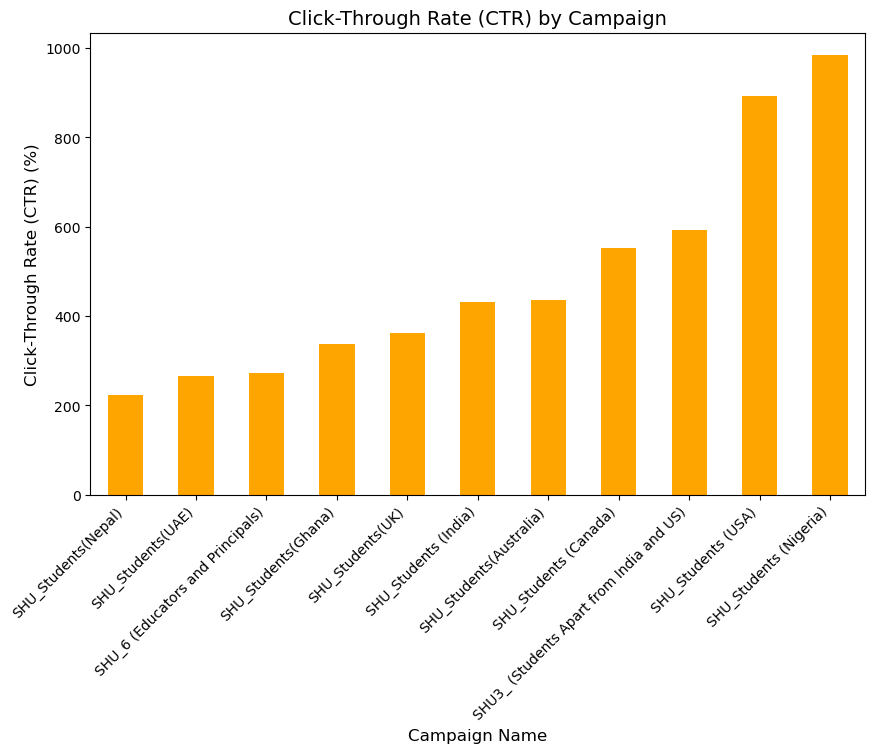

In [44]:
# 3. Click-Through Rate (CTR) by Campaign
plt.figure(figsize=(10, 6))
cleaned_data.groupby('Campaign Name')['Click-Through Rate (CTR)'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Click-Through Rate (CTR) by Campaign', fontsize=14)
plt.ylabel('Click-Through Rate (CTR) (%)', fontsize=12)
plt.xlabel('Campaign Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

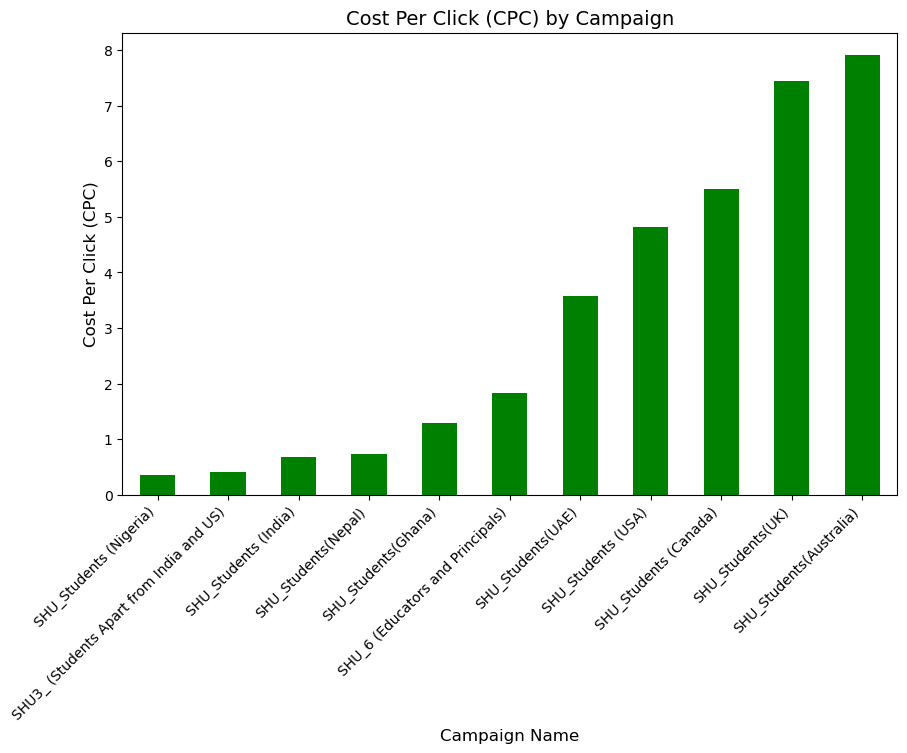

In [46]:
# 4. Cost Per Click (CPC) by Campaign
plt.figure(figsize=(10, 6))
cleaned_data.groupby('Campaign Name')['Cost Per Click (CPC)'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Cost Per Click (CPC) by Campaign', fontsize=14)
plt.ylabel('Cost Per Click (CPC)', fontsize=12)
plt.xlabel('Campaign Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

#cpr (refined) week 2 

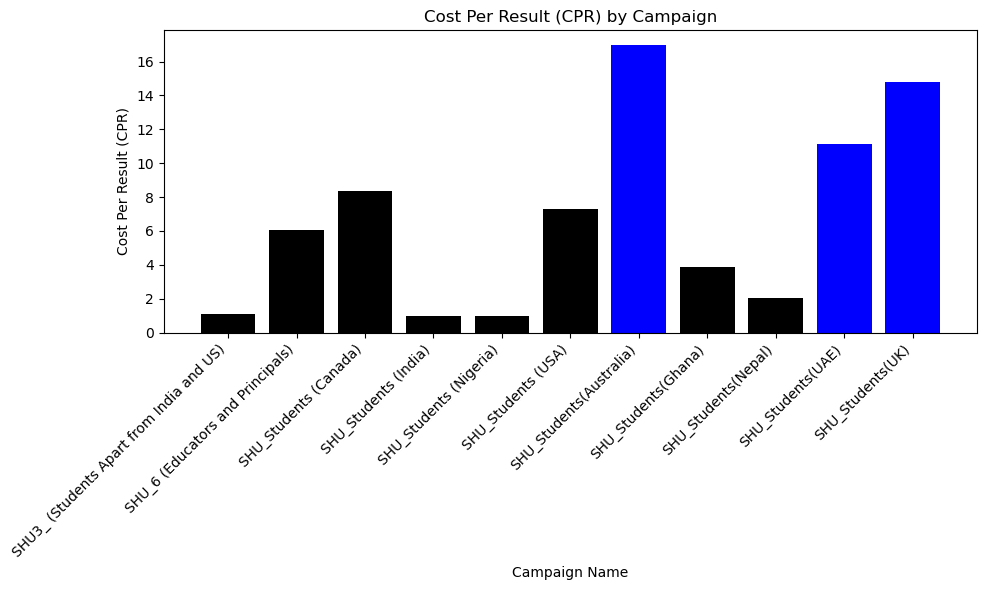

In [193]:

# 1. Cost Per Result (CPR) by Campaign
cpr = cleaned_data.groupby('Campaign Name')['Cost per Result (CPR)'].first()
                                                                                                       
# Highlight top 3 campaigns with the highest CPR
highlight_cpr_campaigns = cpr.nlargest(3).index

# Assign colors: red for highlighted campaigns, gray for others
colors_cpr = ['blue' if campaign in highlight_cpr_campaigns else 'black' for campaign in campaigns]

# Plot CPR
plt.figure(figsize=(10, 6))
bars_cpr = plt.bar(campaigns, cpr, color=colors_cpr)
plt.title('Cost Per Result (CPR) by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Cost Per Result (CPR)')
plt.xticks(rotation=45, ha='right') 

# Add annotations
#for bar, campaign in zip(bars_cpr, campaigns):
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'${height:.2f}', ha='center')

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1456\105904116.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(campaigns))  # 'tab20' provides a palette of 20 colors


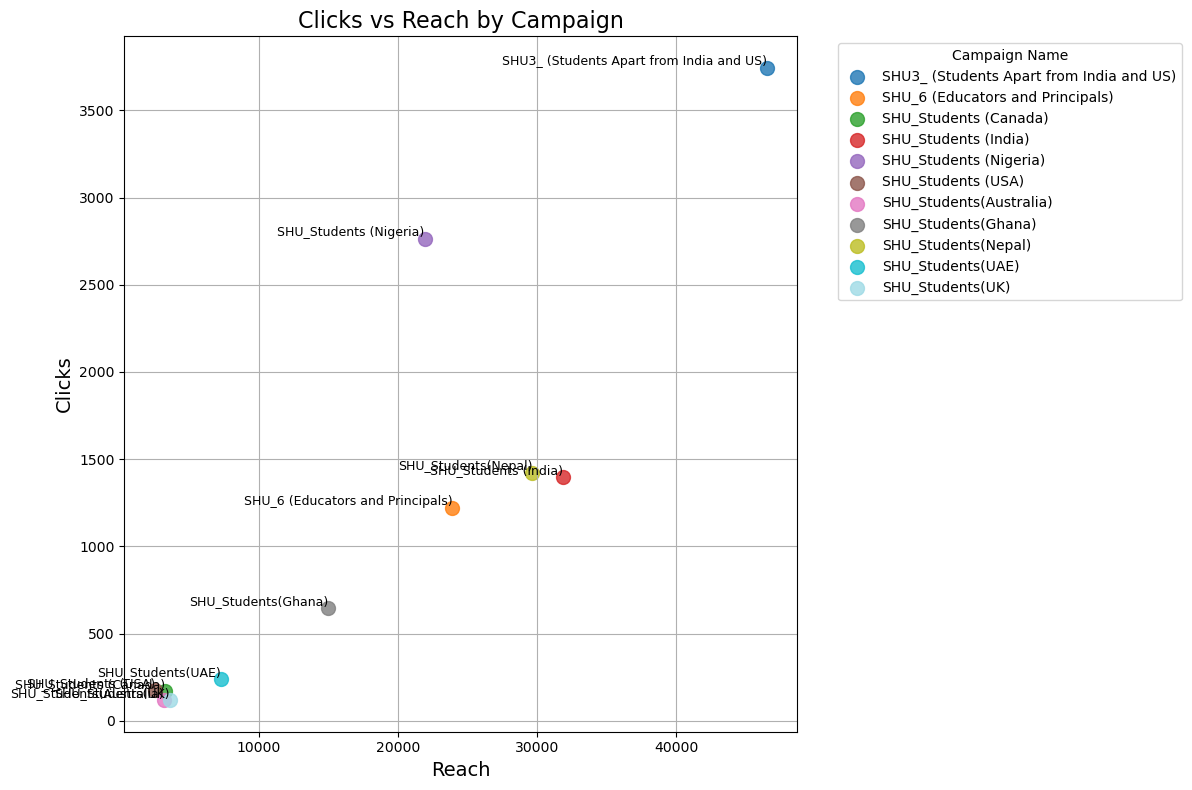

In [158]:


# Grouping data by 'Campaign Name' to get total 'Reach' and 'Clicks'
reach = cleaned_data.groupby('Campaign Name')['Reach'].sum()
clicks = cleaned_data.groupby('Campaign Name')['Clicks'].sum()
campaigns = reach.index  # Ensure we use the correct campaign names

# Use a colormap to generate unique colors for each campaign
colors = plt.cm.get_cmap('tab20', len(campaigns))  # 'tab20' provides a palette of 20 colors

plt.figure(figsize=(12, 8))

# Plot each campaign with a unique color
for i, campaign in enumerate(campaigns):
    plt.scatter(reach[i], clicks[i], color=colors(i), s=100, alpha=0.8, label=campaign)

# Add campaign names as text annotations
for i, campaign in enumerate(campaigns):
    plt.text(reach[i], clicks[i], campaign, fontsize=9, ha='right', va='bottom')

# Add title, labels, and legend
plt.title('Clicks vs Reach by Campaign', fontsize=16)
plt.xlabel('Reach', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.grid(True)
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot with adjusted layout
plt.tight_layout()
plt.show()


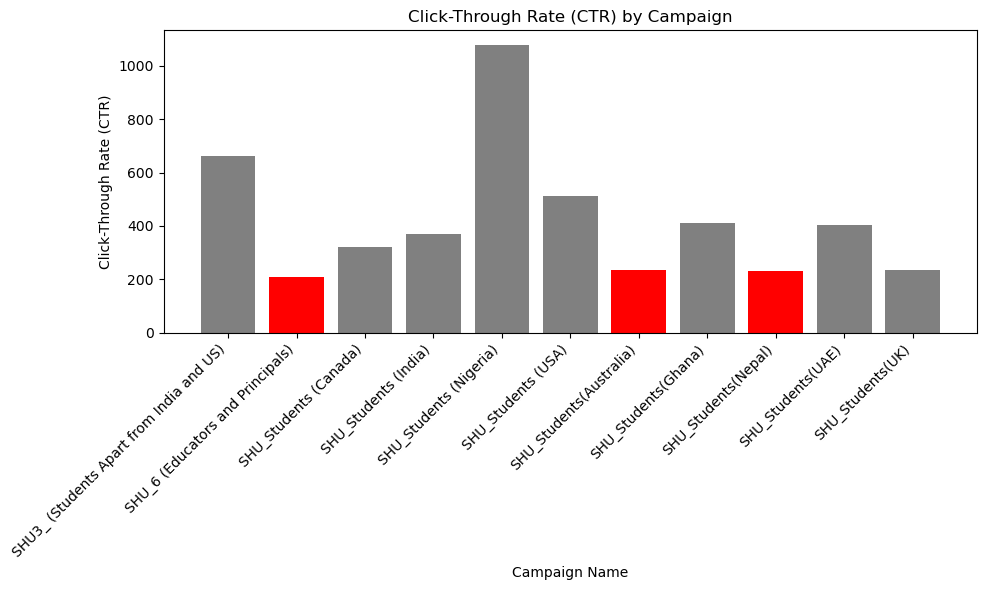

In [191]:
# 3. Click-Through Rate (CTR) by Campaign
ctr = cleaned_data.groupby('Campaign Name')['Click-Through Rate (CTR)'].first()

# Highlight campaigns with low CTR
highlight_ctr_campaigns = ctr.nsmallest(3).index
colors_ctr = ['red' if campaign in highlight_ctr_campaigns else 'gray' for campaign in campaigns]

plt.figure(figsize=(10, 6))
bars_ctr = plt.bar(campaigns, ctr, color=colors_ctr)
plt.title('Click-Through Rate (CTR) by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Click-Through Rate (CTR)')
plt.xticks(rotation=45, ha='right')

# Add annotations
#for bar, campaign in zip(bars_ctr, campaigns):
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}%', ha='center')

plt.tight_layout()
plt.show()


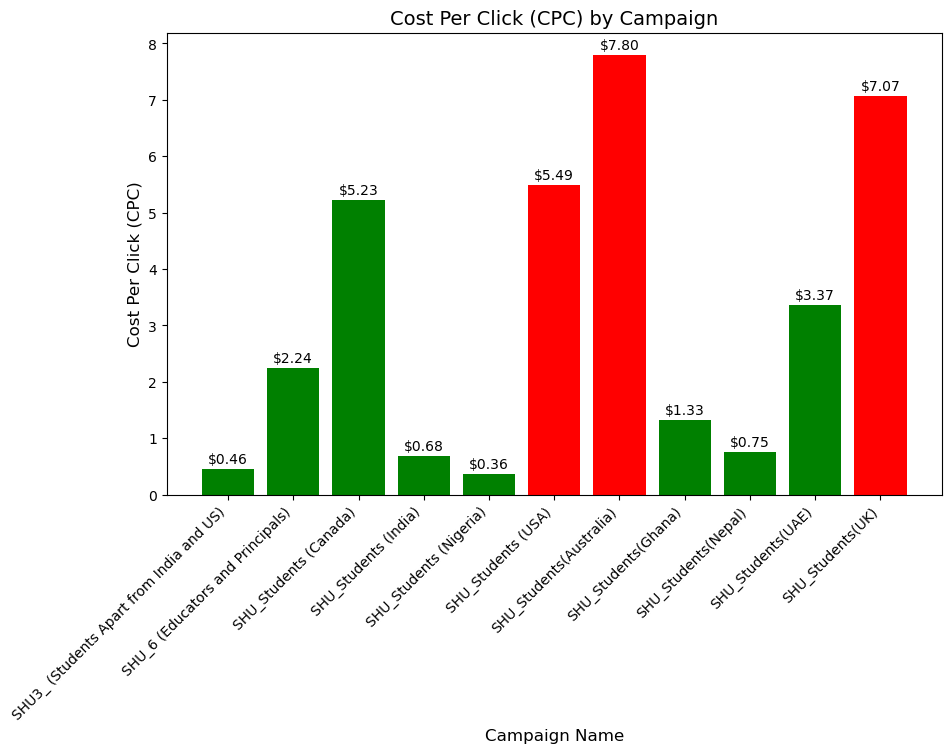

In [189]:
# 4. Cost Per Click (CPC) by Campaign

plt.figure(figsize=(10, 6))
cpc=cleaned_data.groupby('Campaign Name')['Cost Per Click (CPC)'].first()
# Highlight the top 3 campaigns with the highest CPC
highlight_cpc_campaigns = cpc.nlargest(3).index

# Assign colors: red for highlighted campaigns, gray for others
colors_cpc = ['red' if campaign in highlight_cpc_campaigns else 'green' for campaign in campaigns]



bars_cpc = plt.bar(campaigns, cpc, color=colors_cpc)
plt.title('Cost Per Click (CPC) by Campaign', fontsize=14)
plt.ylabel('Cost Per Click (CPC)', fontsize=12)
plt.xlabel('Campaign Name', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add annotations to display CPC values on top of the bars
for bar, campaign in zip(bars_cpc, campaigns):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'${height:.2f}', ha='center')


plt.show()


